<a href="https://colab.research.google.com/github/natrask/ENM5310/blob/main/Graph_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!/usr/bin/env python
# coding: utf-8
# In[91]:
import numpy as np
import scipy
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()
config = tf.ConfigProto()
sess = tf.Session(config=config)

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
Nnodes*(Nnodes-1)/2

3.0

In [12]:
Nnodes = 6
delta = np.zeros((1,Nnodes))
cnt=0
for i in range(Nnodes):
    for j in range(Nnodes):
        if j > i:
            delta[cnt][j] = 1.
            delta[cnt][i] = -1.
            cnt += 1

#Recast as matrices
delta = np.mat(delta)
deltaT = delta.T
graphLaplacian = np.einsum('ij,jk->ik',deltaT,delta)

#Plot sparsity patterns of graph gradient and graph laplacians
plt.spy(delta)
plt.spy(graphLaplacian)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
x_in = tf.placeholder(shape=(None,1),dtype=tf.float64)
f_in = tf.placeholder(shape=(None,1),dtype=tf.float64)

NNhidden0_u = tf.layers.Dense(10,activation='tanh')
NNhidden1_u = tf.layers.Dense(10,activation='tanh')
NNlinear_u  = tf.layers.Dense(1,activation='linear')
def NN_u(x):
  return NNlinear_u(NNhidden1_u(NNhidden0_u(x)))
u_sol  = NN_u(x_in)
uleft  = NN_u(tf.zeros((1,1),tf.float64))
uright = NN_u(tf.ones ((1,1),tf.float64))

dudx_sol = tf.gradients(u_sol,x_in)[0]
d2udxx_sol = tf.gradients(dudx_sol,x_in)[0]

PDE_res = tf.reduce_sum( (d2udxx_sol - f_in    )**2)
PDE_BC1 = tf.reduce_sum( (uleft      - BCleft  )**2)
PDE_BC2 = tf.reduce_sum( (uright     - BCright )**2)

#Arbitrarily taking sum of loss function
LOSS = PDE_res + PDE_BC1 + PDE_BC2
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(LOSS)
sess.run(tf.global_variables_initializer()) #initialize model

In [ ]:
data_dict = {x_in:np.expand_dims(points,-1),f_in:np.ones((meshsize,1))}
for i in range(10000):
  sess.run(optimizer,feed_dict=data_dict)
  if i % 100 == 0:
    uexact = -0.5*points*(1.0-points)
    error = np.sqrt(np.mean(((sess.run(u_sol,feed_dict=data_dict)-uexact)**2)))
    print(i,sess.run(LOSS,feed_dict=data_dict),error)

0 1.5757712378786205e-05 0.054822740198611095
100 1.6201996154252446e-05 0.054826129903233066
200 1.5218757563659172e-05 0.05482274270593398
300 1.4985418325533982e-05 0.054822746741423845
400 1.4746801354807999e-05 0.05482274878152953
500 2.2159603762457465e-05 0.054811446962914026
600 1.4278683220725886e-05 0.054822018646498154
700 1.4033937372056275e-05 0.05482275359821998
800 1.3820183481279146e-05 0.05482275673874316
900 1.3601170006047603e-05 0.054822758542744786
1000 2.680094990385357e-05 0.0548080577020252
1100 1.3161776009385661e-05 0.05482283364875872
1200 1.2968895373768328e-05 0.05482276389404449
1300 1.2771817215812416e-05 0.05482276625138102
1400 1.3090089787549935e-05 0.05481980170082142
1500 1.2379119815733176e-05 0.054822172290859415
1600 1.2183451579643339e-05 0.05482276324373713
1700 1.2007459943011061e-05 0.054822773586933236
1800 1.1826933737111275e-05 0.05482277513939391
1900 4.439334359629776e-05 0.054847679649050525
2000 1.1461330075337938e-05 0.0548229970382443

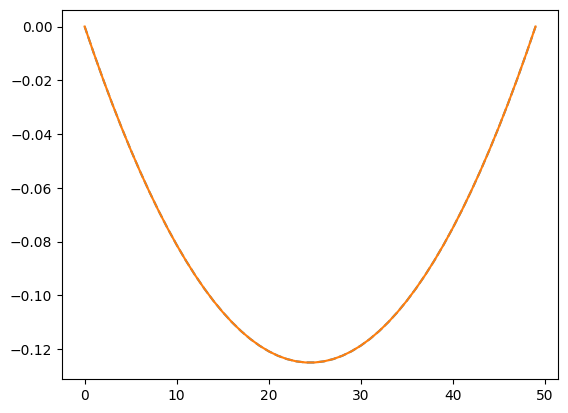

In [ ]:
plt.plot(sess.run(u_sol,feed_dict=data_dict),'--')
uexact = -0.5*points*(1.0-points)
plt.plot(uexact)
